In [2]:
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
import nlpaug
import nlpaug.augmenter.word as naw
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

D:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\light\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\light\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 1. importing data using pandas

In [4]:
job_titles_df = pd.read_csv("./resources/Job titles and industries.csv")

# 2. Exploration Data Analysis

In [5]:
job_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8586 entries, 0 to 8585
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job title  8586 non-null   object
 1   industry   8586 non-null   object
dtypes: object(2)
memory usage: 134.3+ KB


In [6]:
print(f'Null values Count:\n{job_titles_df.isna().sum()}')

Null values Count:
job title    0
industry     0
dtype: int64


In [7]:
print(f"Classes count:\n{job_titles_df['industry'].value_counts()}")

Classes count:
IT             4746
Marketing      2031
Education      1435
Accountancy     374
Name: industry, dtype: int64


In [8]:
print(f"Duplication in Data:\n{job_titles_df['job title'].value_counts()}")

Duplication in Data:
marketing executive                                           91
php developer                                                 54
trainee network technician                                    53
software developer                                            53
marketing manager                                             49
                                                              ..
digital designer - ux/ui                                       1
digital marketing executive - restaurant chain                 1
marketing and creative manager - salary circa £50k - poole     1
data analyst, sql, ecommerce, central london - £45k            1
creative copywriter (arabic/english)                           1
Name: job title, Length: 3890, dtype: int64


In [10]:
print('Words Count:',job_titles_df['job title'].apply(lambda line: len(line.split(' '))).count())

Words Count: 8586


# 3. Data Preprocessing

## 3.1. Data Cleaning 

In [26]:
job_titles_df['job_title_f1'] = job_titles_df['job title'].str.replace(r'(-{0,1}[\W\D]£.*-{0,1})|(\d+k)|(up to)|(ftse\s\d+)|(\d{0,1}\sx\s\d{0,1})|(\d+\smonth[s]{0,1})','',regex=True)
job_titles_df['job_title_f1'] = job_titles_df['job_title_f1'].str.replace(r'(-\s\d+.\d+)|([-(),/])','',regex=True)
job_titles_df['job_title_f1'] = job_titles_df['job_title_f1'].str.replace(r'\s+',' ',regex=True)

In [27]:
job_titles_df['job_title_f1'] = job_titles_df['job_title_f1'].apply(lambda line: line.strip())

In [28]:
dublicated_df = pd.DataFrame(job_titles_df[['job_title_f1','industry']].value_counts().rename_axis(['job_title_f1','industry']).reset_index(name='counts'))
dublicated_df[dublicated_df['job_title_f1'].duplicated()]

,job_title_f1,industry,counts
272,digital marketing specialist,Education,6
278,product manager,IT,6
280,marketing specialist,Education,6
317,accountant,Marketing,5
509,data analyst,Marketing,4
...,...,...,...
3510,frontend developer,Education,1
3585,fullstack developer,Education,1
3683,finance assistant,Education,1
3779,hr specialist,Education,1


## 3.2. Wrong Label Correction 

In [29]:
specialization_drop_list = ['admin assistant','receptionist','graduate','sales agent','graduate analyst','pricing analyst','sales executive','executive secretary','sales manager','secretary','administrator','administrative assistant','assistant manager','call center agent','hr specialist']
job_titles_df.loc[job_titles_df['job_title_f1'].isin(specialization_drop_list)]=np.nan
job_titles_df.dropna(inplace=True)

In [31]:
# ----------------------------------------Marketing--------------------------------------------
job_titles_df.loc[job_titles_df['job_title_f1']=='marketing specialist','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='digital marketing specialist','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='graphic designer','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='marketing manager','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='account manager','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='sales representative','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='customer service representative','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='customer service specialist','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='business development specialist','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='digital product manager','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='senior content executive','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='senior account executive','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='senior digital analyst','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='digital data analyst','industry']='Marketing' 
job_titles_df.loc[job_titles_df['job_title_f1']=='digital marketing executive','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='digital performance analyst','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='digital project manager','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='junior graphic designer','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='marketing & social media specialist','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='marketing executive','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='analytics manager','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='lead digital analyst','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='lead digital analyst','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='design manager','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='telesales representative','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='telesales agent','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='photographer','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='social media specialist','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='ux designer','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='project manager','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='project administrator','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='product manager','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='key account manager','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='business development manager','industry']='Marketing'
job_titles_df.loc[job_titles_df['job_title_f1']=='business development executive','industry']='Marketing'


# ----------------------------------------IT--------------------------------------------
job_titles_df.loc[job_titles_df['job_title_f1']=='frontend developer','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='fullstack developer','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='backend developer','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='php web developer','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='php web developer','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='data analyst','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='data scientist','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='web designer','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='ios developer','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='php developer','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='senior php developer','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='senior it specialist','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='senior analyst','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='senior full stack developer','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='senior ios developer','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='senior data analyst','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='crm manager','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='analytics manager','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='android developer','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='client onboarding support','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='bi analyst','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='insights & analytics manager','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='front-end developer','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='full-stack developer','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='technical support engineer','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='software developer','industry']='IT'
job_titles_df.loc[job_titles_df['job_title_f1']=='project coordinator','industry']='IT'


# ----------------------------------------Accountancy--------------------------------------------
job_titles_df.loc[job_titles_df['job_title_f1']=='accountant','industry']='Accountancy'
job_titles_df.loc[job_titles_df['job_title_f1']=='commercial analyst','industry']='Accountancy'
job_titles_df.loc[job_titles_df['job_title_f1']=='finance assistant','industry']='Accountancy'

# ----------------------------------------Education--------------------------------------------
job_titles_df.loc[job_titles_df['job_title_f1']=='it trainer','industry']='Education'

In [32]:
job_titles_df.to_csv('./resources/2nd_stage_filtration.csv',index=False)

# 4. Spliting the data
### Splitting the data befor Data augmatation in order not to fit hand made features

In [33]:
train_x, val_x, train_y, val_y = train_test_split(job_titles_df['job_title_f1'],job_titles_df['industry'],test_size=0.1,stratify=job_titles_df['industry'],random_state=42)
train_x, test_x, train_y, test_y = train_test_split(train_x,train_y,test_size=0.1,stratify=train_y,random_state=42)

# 5. Feature Engineering

In [35]:
def transform_text(vectorizer):
    train_x_transformed = vectorizer.transform(train_x)
    val_x_transformed = vectorizer.transform(val_x)
    test_x_transformed = vectorizer.transform(test_x)
    return train_x_transformed, val_x_transformed, test_x_transformed

## 5.1. Data Augmantation

In [34]:
aug = naw.SynonymAug(aug_src='wordnet',aug_max=2)
augmanted_data = pd.DataFrame(job_titles_df[job_titles_df['industry']=='Accountancy']['job_title_f1'].apply(lambda line: aug.augment(line,n=1)))
augmanted_data['industry'] = 'Accountancy'
train_x = pd.concat([train_x,augmanted_data['job_title_f1']],axis=0)
train_y = pd.concat([train_y,augmanted_data['industry']],axis=0)

## 5.2. Vectorize the Data
### **Note:** Tfidftransformer you will systematically compute word counts using CountVectorizer and then compute the Inverse Document Frequency (IDF) values and only then compute the Tf-idf scores for each word

In [37]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w+', max_features=5000)
tfidf_vect.fit(job_titles_df['job_title_f1'])

TfidfVectorizer(max_features=5000, token_pattern='\\w+')

# 6. Buliding & Evaluating the model

In [39]:
classes_list = job_titles_df['industry'].unique().tolist()

def evluate_model(classifier, feature_vector_train, label, feature_vector_valid, feature_vector_valid_label,classes_list):
    classifier.fit(feature_vector_train, label)
    predictions = classifier.predict(feature_vector_valid)
    print(classification_report(feature_vector_valid_label,predictions))
    print('Accuracy:',accuracy_score(feature_vector_valid_label,predictions))
    return confusion_matrix(feature_vector_valid_label, predictions,labels=classes_list)

def print_confusion_matrix(conf_mat,classes_list):
    fig = plt.figure(figsize=[25,15])
    ax = fig.gca()
    sns.heatmap(conf_mat,xticklabels=classes_list,yticklabels=classes_list,annot=True,cmap='coolwarm',fmt='g',ax= ax)

## 6.2. SVM model 

In [44]:
from sklearn.svm import SVC
train_x_count, val_x_count, test_x_count = transform_text(tfidf_vect)
conf_mat = evluate_model(SVC(C=1,gamma=2,class_weight={"Accountancy":2,"IT":3,"Education":1,"Marketing":3}),train_x_count,train_y,val_x_count,val_y,classes_list)

              precision    recall  f1-score   support

 Accountancy       0.95      0.97      0.96        39
   Education       0.99      0.91      0.95       137
          IT       0.96      0.99      0.97       471
   Marketing       0.96      0.94      0.95       206

    accuracy                           0.96       853
   macro avg       0.96      0.95      0.96       853
weighted avg       0.96      0.96      0.96       853

Accuracy: 0.9624853458382181


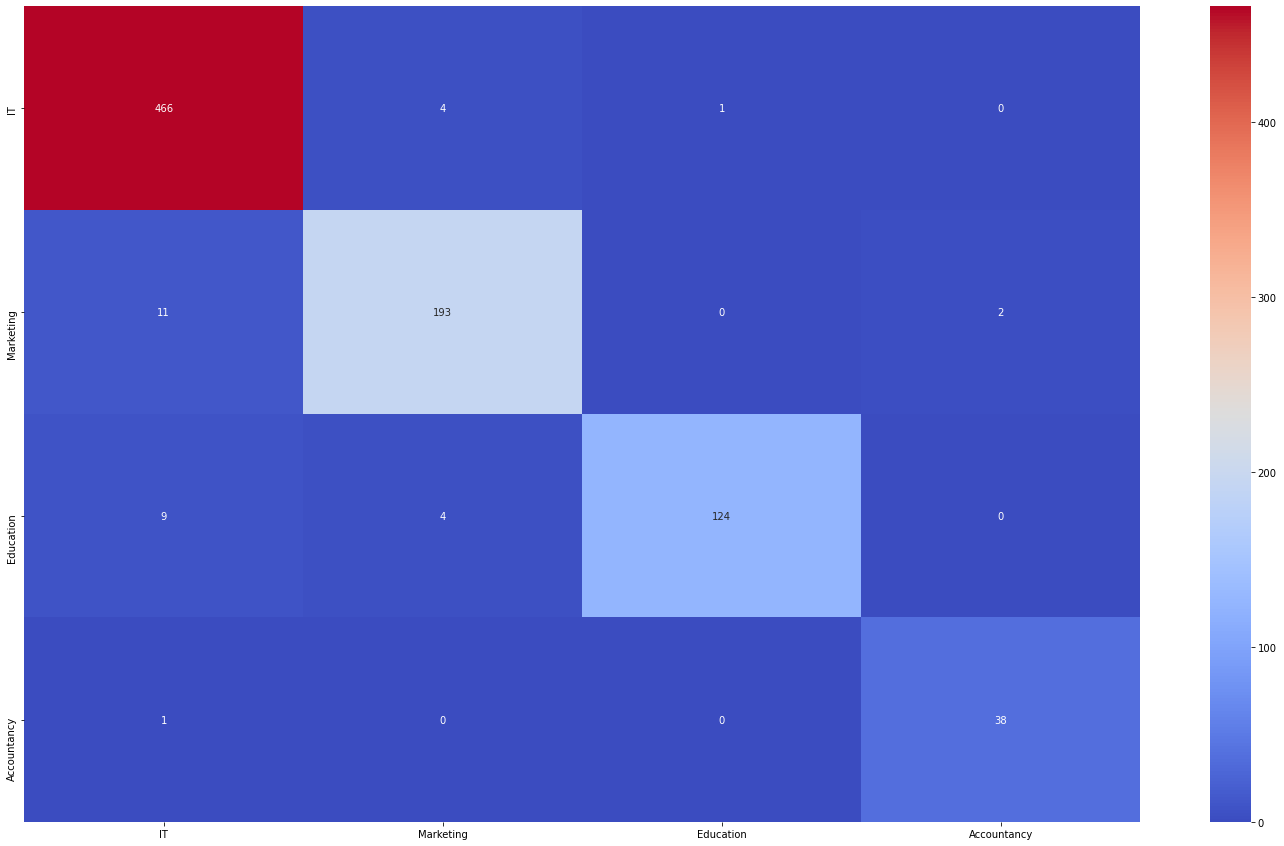

In [45]:
print_confusion_matrix(conf_mat,classes_list)

In [46]:
svc = SVC(C=1,gamma=2,probability=True,class_weight={"Accountancy":2,"IT":3,"Education":1,"Marketing":3}).fit(train_x_count,train_y)
predict_y = svc.predict(test_x_count)
print(classification_report(test_y,predict_y))
print("Accuracy:",accuracy_score(test_y,predict_y))

              precision    recall  f1-score   support

 Accountancy       1.00      1.00      1.00        35
   Education       1.00      0.99      1.00       123
          IT       0.99      0.99      0.99       424
   Marketing       0.98      0.97      0.98       185

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767

Accuracy: 0.9869621903520208


# 7. Saving the Final Model
* ## Saving the Model to pickle file
* ## Saving the Vectorizer to pickle file

In [ ]:
pickle.dump(svc, open('./resources/Model/final_prediction.pickle', 'wb'))

In [ ]:
pickle.dump(tfidf_vect, open('./resources/Vectorizer/final_vectorizer.pickle', 'wb'))

# 8. Questions Answers:
* ##	Which techniques you have used while cleaning the data if you have cleaned it?
### I used regex over the regular methods as it’s more powerful than the other techniques to clean “job title” column from undesired words/characters mainly to remove the salaries, I also decided to keep company names taking in concertation I only have around 8000 words in the dataset also it may contain words related to the industry which will make the model even better, I also notes that we have same job title for different categories EG. IOS developer wrongly labeled as Marketing, I fixed this job titles to fall only in one category, some jobs belong to classes doesn’t exist in the data I thought dropping them will be the best way to handle them.
*	## Why have you chosen this classifier?
###	At first, I thought about 4 models that would fit this problem, which are Support Vector Machine, Multinomial Naïve Bayes, Logistic Regression and Deep Neural Network, but I excluded the Naïve Bayes because this classifier assumes the words in the text are independent and has no relation between each other which is not the case in the data, also excluded the Logistic regression classifier as it’s doesn’t contain hyper-parameter making it less flexible in case of imbalanced data, while excluding DNN due to the size of the data, I found that support vector machine will be good model for our case due to:
  1. ### it doesn’t assume that each word is independent meaning it tries to find the relations between the words in the same line
  2. ### Contain only two hyper parameter “C and Gamma” makes it easer to tune also flexible with imbalanced data
*	## How do you deal with (Imbalance learning)?
###	Imbalance learning can be treated by many ways but, I used class weight to give each class appropriate weight, I also used text data augmentation by replacing 2 randomly selected words by its Synonym done this only for the minor class to because I already have enough word in the 3 major classes, text augmentation greatly improved the precision, recall and f1 scores for the minor class, I also notes the existence of duplicates in the data within the same category but decided to keep them in our case as the purpose of the training set is to accumulate real-life experience, which we will not achieve if you lose the frequency information.
* ##	How can you extend the model to have better performance?
###	The Marketing and the IT classes suffer from over lapping in the job title or to be specific lots of the words used to describe IT jobs has similar jobs containing the same word so traying to increase the number of words describing these jobs (translate the job title to different language then translate it back may help) may improve the performance, also if we can get enough data, we can use RNN or LSTM deep learning models, better tuning for the hyper parameter
* ##	How do you evaluate your model?
###	I evaluated my model through confusion matrix, precision, recall, f1 and accuracy scores, can’t relay only on accuracy when handling imbalanced data so measuring precision, recall and f1 score gives an indication and help me stop the model from predicting the major class to any input, confusion matrix helps in detecting over lapping between classes. 
* ##	What are the limitations of your methodology or where does your approach fail?
###	My Methodology:
1. ### can’t handle overlapping between classes (noise data) probably and this is already happen between Marketing and IT classes
2. ### not suitable for large datasets as SVM not suited for large data
3. ### Can also fail if the text has more words than the number of samples
4. ### Don’t have general class so jobs like receptionist, and manager assistant get classified wrongly
